# Clustering Gerarchico
Il Clustering Gerarchico è un metodo di clustering che affronta il problema creando una gerarchia di cluster.<br>
Esistono due tipologie di Clustering Gerarchico:
 * **Agglomerativo** e' un approccio *bottom-up*, in cui si parte creando un cluster per ogni esempio e gradualmente si uniscono due a due, fino ad ottenere un unico cluster.
 * **Divisivo** è un approccio *top-down*, in cui si parte con un cluster che contiene tutti gli esempi che viene man mano suddiviso ricorsivamente in sotto-clusters.
 
 In questo notebook utilizzeremo il Clustering Gerarchico Agglomerativo per raggruppare in cluster un dataset generato da noi.<br><br>
 Importiamo matplotlib e seaborn, impostiamo la dimensione di default dei grafici e settiamo lo stile di seaborn.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (14, 10)
sns.set()

Creiamo il nostro dataset, composto da 100 esempi che possono essere suddivisi in 3 clusters.

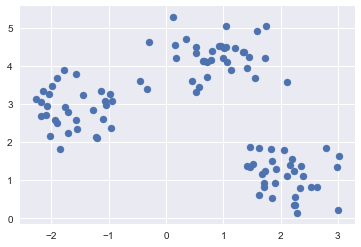

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=100, centers=3,
                       cluster_std=.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

## Creare un dendrogramma con scipy
Possiamo utilizzare scipy per eseguire il clustering gerarchico agglomerativo di un dataset, in questo modo otterremo un **dendrogramma** che conterrà tutti i possibili cluster.
<br><br>
Per farlo utilizziamo le seguenti funzioni:
* **<span style="font-family: Monaco">linkage</span>**: per eseguire il clustering gerarchico
* **<span style="font-family: Monaco">dendrogram</span>**: per costruire il dendrogramma

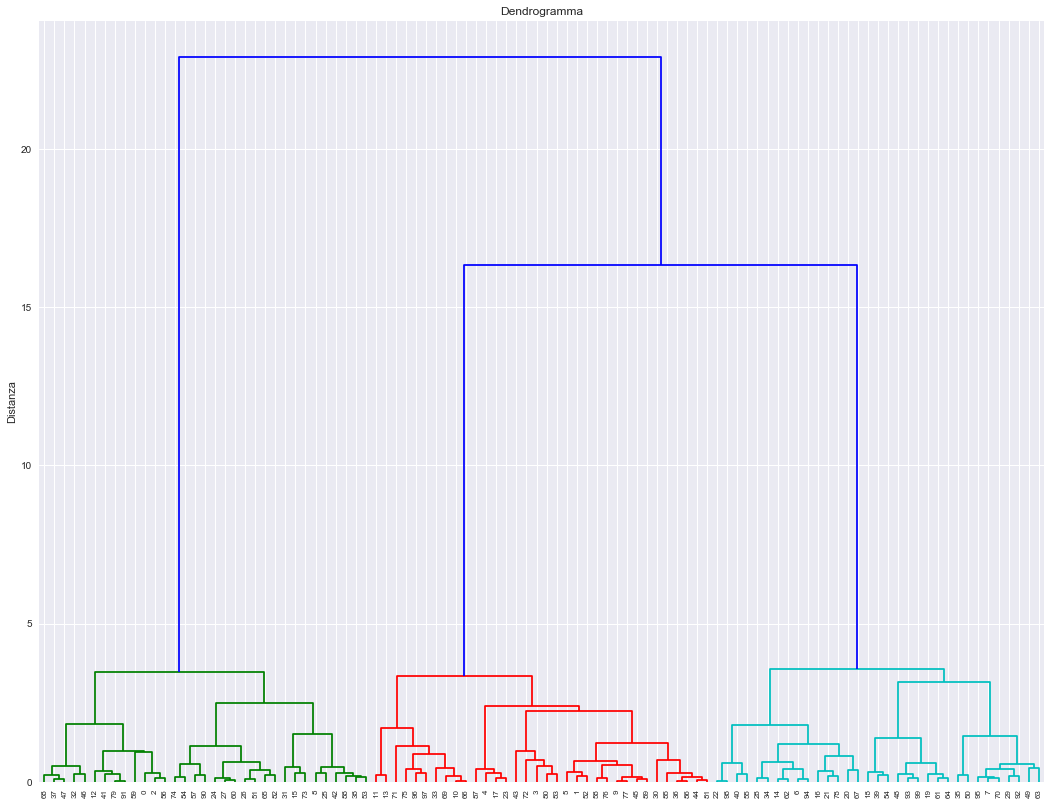

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(18,14))
dendogram = dendrogram(linkage(X, method="ward"))
plt.ylabel("Distanza")
plt.title("Dendrogramma")
plt.xticks(fontsize=8)
plt.show()

Ecco il nostro dendrogramma.
<br><br>
Possiamo osservare che i clusters rappresentati dalle linee blu sono stati formati dall'unione di clusters che hanno una distanza notevolmente maggiore rispetto a quelli sottostanti, quindi se volessimo tagliare il dendrogramma possiamo posizionare la nostra soglia qui.<br>
<img src="res/dendrogram.jpg" width="1200px"></img>

Contando il numero di linee che la soglia attraversa otteniamo il numero di cluster, che è pari a 3.

## Clustering Gerarchico Agglomerativo con scikit-learn
Possiamo eseguire il Clustering Gerarchico Agglomerativo anche utilizziando scikit-learn, ma in questo caso dobbiamo specificare il numero di cluster come parametro del modello, quindi a priori.
<br><br>
Dalla precedente analisi del dendrogramma abbiamo determinato che il numero di clusters ottimale è 3, quindi possiamo passare a costruire il modello, per farlo utilizziamo la classe <span style="font-family: Monaco">AgglomerativeClustering</span> di scikit-learn a cui dobbiamo passare il numero di clusters da cercare all'interno del parametro <span style="font-family: Monaco">n_clusters</span>.

In [5]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3)
y = hc.fit_predict(X)

Stampiamo il risultato del clustering su di uno scatter plot.

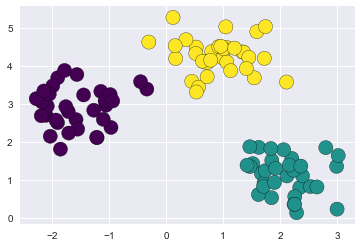

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=200, cmap='viridis', edgecolors="black");